# Chapter 8: Statistical Tests

In [58]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm

## Test With Numeric Data

In [59]:
admission = pd.read_csv('../data/admission.csv')

In [60]:
admission.head()

,GPA,GMAT,De
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit


In [61]:
admission.std()['GMAT'], admission.mean()['GMAT'], admission.quantile(.75)['GMAT']

C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/2814391968.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  admission.std()['GMAT'], admission.mean()['GMAT'], admission.quantile(.75)['GMAT']


(81.52234661244044, 488.4470588235294, 538.0)

In [62]:
def p_2tail(sampdist,tstat):
    hyp = np.mean(sampdist)
    cutoff1 = hyp - np.abs(hyp - tstat)
    cutoff2 = hyp + np.abs(hyp - tstat)
    
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r')
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g')
    plt.show()
    
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist)
    return pvalue

***Mean***

C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/2521001947.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s1 = np.random.normal(size=sampsize, loc=510, scale=admission.std()['GMAT'])
C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/2521001947.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tstat = admission.mean()['GMAT']


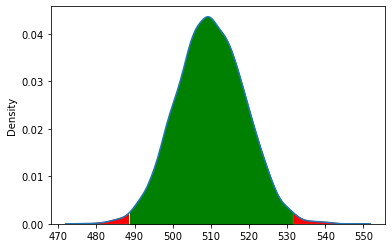

0.014

In [63]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=510, scale=admission.std()['GMAT'])
    return np.mean(s1)
sampdist = [f1() for _ in range(10000)]
tstat = admission.mean()['GMAT']
p_2tail(sampdist,tstat)

***Standard Deviation***

C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/2383123660.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu = admission.mean()['GMAT']
C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/2383123660.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tstat = admission.std()['GMAT']


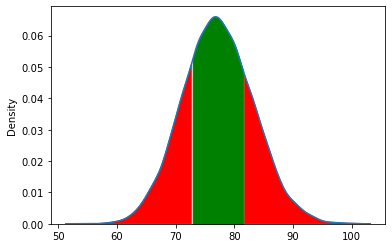

0.4737

In [64]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    mu = admission.mean()['GMAT']
    s1 = np.random.normal(size=sampsize, loc=mu, scale=78)
    return np.std(s1)
sampdist = [f1() for _ in range(10000)]
tstat = admission.std()['GMAT']
p_2tail(sampdist,tstat)

***Median***

C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/3034076394.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s1 = np.random.normal(size=sampsize, loc=500, scale=admission.std()['GMAT'])
C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/3034076394.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tstat = admission.median()['GMAT']


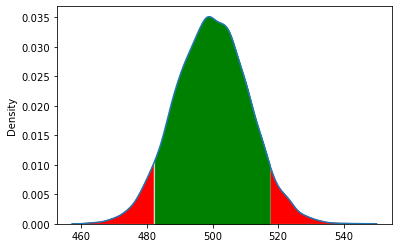

0.1043

In [65]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=500, scale=admission.std()['GMAT'])
    return np.median(s1)
sampdist = [f1() for _ in range(10000)]
tstat = admission.median()['GMAT']
p_2tail(sampdist,tstat)

***Percentile***

In [66]:
norm.ppf(0.75)

0.6744897501960817

In [67]:
newm = 600 - (norm.ppf(0.75) * admission.std()['GMAT'])
print(newm)

545.0140127979766


C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/121894670.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newm = 600 - (norm.ppf(0.75) * admission.std()['GMAT'])


In [68]:
norm.ppf(q=0.75, loc = newm, scale = admission.std()['GMAT'])

C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/2611755875.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm.ppf(q=0.75, loc = newm, scale = admission.std()['GMAT'])


600.0

C:\Users\stefan\AppData\Local\Temp/ipykernel_14820/2063921997.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s1 = np.random.normal(size=sampsize, loc=newm, scale=admission.std()['GMAT'])


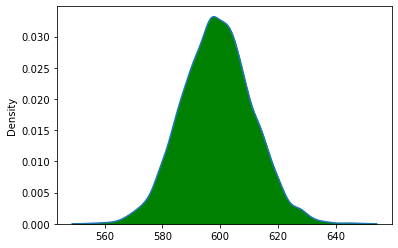

0.0

In [69]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=newm, scale=admission.std()['GMAT'])
    return np.quantile(s1, 0.75)
sampdist = [f1() for _ in range(10000)]
tstat = admission.quantile(.75)['GMAT']
p_2tail(sampdist,tstat)

***Normality Test***

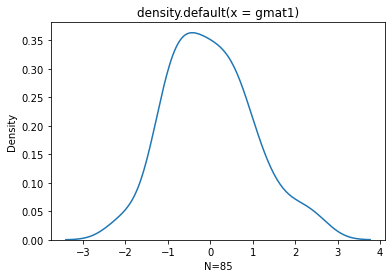

In [70]:
from sklearn.preprocessing import scale

gmat1 = scale(admission['GMAT'])
sns.kdeplot(gmat1)
plt.xlabel('N=85')
plt.ylabel('Density')
plt.title('density.default(x = gmat1)')
plt.show()

Let's plot a normal distribution for the comparision with the distribution of the sample:

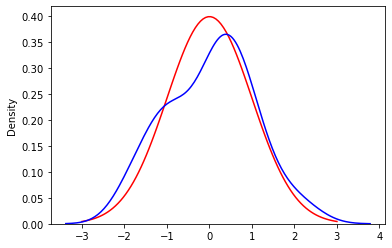

In [76]:
np.random.seed(87654321)
x = np.linspace(-3, 3, 100)

fig, axs = plt.subplots(1, 1)
axs.plot(x, norm.pdf(x, loc = 0, scale = 1), color='r')
s1 = np.random.normal(size=50, loc=0, scale=1)
sns.kdeplot(s1, color='b', ax=axs)
plt.show()

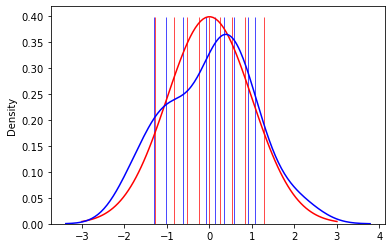

In [90]:
quantiles = np.arange(0.1, 1, 0.1) # stop value "1" is excluded
qvaluespop = norm.ppf(quantiles, loc = 0, scale = 1)
plt.plot(x, norm.pdf(x, loc = 0, scale = 1), color='r')
sns.kdeplot(s1, color='b')

plt.vlines(x=qvaluespop, ymin=0, ymax=np.max(norm.pdf(x=qvaluespop, loc=0, scale=1)), color='r', linewidth=0.7)
qvaluessamp = np.quantile(s1, q=quantiles)
plt.vlines(x=qvaluessamp, ymin=0, ymax=np.max(norm.pdf(x=norm.ppf(quantiles, loc=0, scale=1), loc=0, scale=1)), color='b', linewidth=0.7)

[-1.282 -0.842 -0.524 -0.253  0.     0.253  0.524  0.842  1.282]
[-1.311 -1.014 -0.622 -0.09   0.136  0.351  0.574  0.912  1.066]


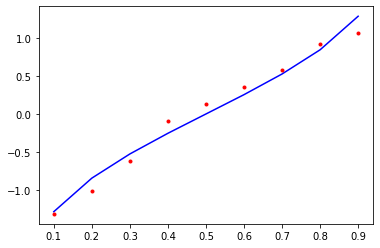

0.11460909048249418


In [94]:
print(np.round(qvaluespop,3))
print(np.round(qvaluessamp,3))
plt.plot(quantiles, qvaluespop, 'b-')
plt.plot(quantiles, qvaluessamp, 'r.')
plt.show()
normmetric = np.mean(np.abs(qvaluespop-qvaluessamp))
print(normmetric)

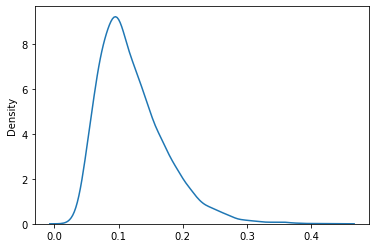

In [96]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    k1 = np.random.normal(size=sampsize, loc=0, scale=1)
    quantiles = np.arange(0.1, 1, 0.1) # stop value "1" is excluded
    qvaluespop = norm.ppf(quantiles, loc = 0, scale = 1)
    qvaluessamp = np.quantile(k1, q=quantiles)
    normmetric = np.mean(np.abs(qvaluespop-qvaluessamp))
    return(normmetric)
sampdist = [f1() for _ in range(10000)]
sns.kdeplot(sampdist)
plt.show()


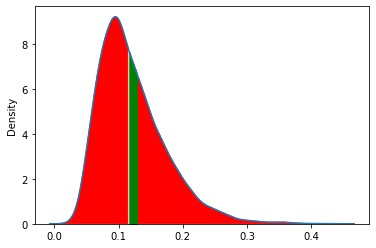

0.8969

In [97]:
# Translate R to python code:
# R code:
# tstat = mean(abs(qvaluespop-qvaluessamp))
# p_rtail(sampdist,tstat)
# Python code:
def p_rtail(sampdist,tstat):
    hyp = np.mean(sampdist)
    cutoff1 = hyp - np.abs(hyp - tstat)
    cutoff2 = hyp + np.abs(hyp - tstat)
    
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r')
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g')
    plt.show()
    
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist)
    return pvalue

tstat = np.mean(np.abs(qvaluespop-qvaluessamp))
p_rtail(sampdist,tstat)
